<a href="https://colab.research.google.com/github/LordWipe67/machine_learning/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importa i pacchetti di base
import numpy as np # Algebra
import matplotlib.pyplot as plt #grafici
import pandas as pd # manipolazione dei dati
# importa il dataset chiamato MNIST ceh contiene 70.000 immagini di numeri scritti a mano
from keras.datasets import mnist

**Data Processing**

In [ ]:
#carica i dati del dataset mninst nelle variabili X_train, y_train e X_test,y_test
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
X_train.shape


(60000, 28, 28)

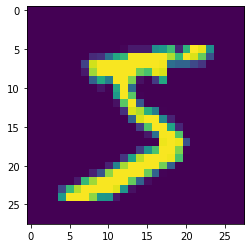

In [ ]:
# rappresentazione del primo numero del dataset
plt.imshow(X_train[0,:])
plt.show()


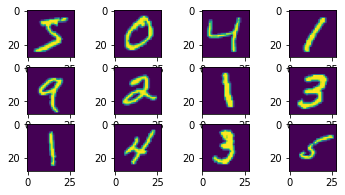

In [ ]:
# rappresentazione dei primi 12 numeri scritti a mano presenti nel dataset MNIST
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i,:])

plt.show()

In [ ]:
# cambia la rappresentazione dell'immagine da matrice 28*28 a vettore di 784
X_train_reshaped = X_train.reshape(60000,28*28)
X_test_reshaped = X_test.reshape(10000,28*28)
# np.unique(X_train)
X_train.shape

(60000, 28, 28)

In [ ]:
# visualizzo la truttura del vettore di train
# X_train_reshaped.shape

In [ ]:
np.max(X_train_reshaped)

255

In [ ]:
np.min(X_train_reshaped)

0

In [ ]:
X_train[0,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
# scalo i dati, dividento per il massimo per aumentare la velocità di convergenza
X_train_scaled = X_train_reshaped/255
X_test_scaled = X_test_reshaped/255
np.max(X_train_scaled)

1.0

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
len(np.unique(y_train))

10

In [ ]:
# prendo le prime 5 immagini della matrice di immagini
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
# trasformiamo i dati presenti in y_train in una matrice
# questo è il modo corretto per trattare un problema di classificazione
# la prima modifica per migliorare il modello è convertire i dati in dammy variables
y_train_dummies = pd.get_dummies(y_train)
y_test_dummies = pd.get_dummies(y_test)
y_train_dummies.shape

(60000, 10)

In [ ]:
# calcolo delle probabilità, questo fa la softmax sotto inserita
# la funzione softmax da in uscita un solo valore come massima probabilità
# se vogliamo costruire un modello che prevede le previsioni del tempo, dove ci possono essere in uscita più di un risultato
# infatti in una giornata potrebbe essere parzialmente nuvoloso, quindi in uscita potremmo avere due probabilità
# nuvoloso e soleggiato, in quel caso dovremmo utilizzare la funzione 'sigmoid' che prevede in uscita non una sola probabilità ma più di una
vettore = [3,4,2]
np.exp(2)/(np.exp(3)+np.exp(4)+np.exp(2))

0.09003057317038045

In [ ]:
# 
y_train_dummies

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


In [ ]:
y_train_dummies

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


**Creazione della rete neurale**

In [ ]:
# pacchetti essenziali per costruire la rete neurale
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D, Activation, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
X_train_tensor = X_train_scaled.reshape(60000,28,28,1)
X_test_tensor = X_test_scaled.reshape(10000,28,28,1)

In [ ]:
model = Sequential()

# # 1° layer
# model.add(Dense(1000, input_shape=(784,)))
# model.add(Activation('relu'))
# model.add(Dropout(0.4))

# # 2° layer
# model.add(Dense(1000))
# model.add(Activation('relu'))
# model.add(Dropout(0.4))

# # 3° layer di uscita
# # model.add(Dense(1))
# model.add(Dense(10))
# model.add(Activation('softmax'))

# 1° strato
model.add(Conv2D(filters=24, kernel_size=(5,5),padding='same', activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D()) # passiamo da un'immagine 28x28 a 14x14

# 2° starto
model.add(Conv2D(filters=64, kernel_size=(5,5),padding='valid', activation='relu')) # l'immagine viene ridotta da 14x14 a 10x10
model.add(AveragePooling2D()) # passiamo da un'immagine 10x10 a 5x5


model.add(Flatten()) # converte la rete neurale da 2D a 1D

# 3° strato
model.add(Dense(units=480,activation='relu'))
model.add(Dropout(0.5))
# 4° strato
model.add(Dense(units=336,activation='relu'))
model.add(Dropout(0.5))

# 5° strato d'uscita
model.add(Dense(units=10,activation='softmax'))


# model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=5, monitor='val_accuracy')
model_checkpoint_callback = ModelCheckpoint(filepath='best_model.hdf5',
                                            monitor='val_accuracy',
                                            mode='auto',
                                            save_best_only=True,
                                            verbose=1)
# model.fit(X_train_scaled, y_train,
#           validation_data=(X_test_scaled,y_test),
#           epochs=10)
history = model.fit(X_train_tensor, y_train_dummies,
          validation_data=(X_test_tensor,y_test_dummies),
          epochs=30,
          callbacks=[early_stopping_monitor,model_checkpoint_callback])

Epoch 1/30
1872/1875 [============================>.] - ETA: 0s - loss: 0.1898 - accuracy: 0.9423
Epoch 1: val_accuracy improved from -inf to 0.98650, saving model to best_model.hdf5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.1896 - accuracy: 0.9424 - val_loss: 0.0421 - val_accuracy: 0.9865
Epoch 2/30
1873/1875 [============================>.] - ETA: 0s - loss: 0.0659 - accuracy: 0.9810
Epoch 2: val_accuracy improved from 0.98650 to 0.98830, saving model to best_model.hdf5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0659 - accuracy: 0.9810 - val_loss: 0.0359 - val_accuracy: 0.9883
Epoch 3/30
1865/1875 [============================>.] - ETA: 0s - loss: 0.0477 - accuracy: 0.9863
Epoch 3: val_accuracy improved from 0.98830 to 0.99010, saving model to best_model.hdf5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0478 - accuracy: 0.9863 - val_loss: 0.0306 - val_accuracy: 0.9901
Epoch 4/30
1866/1875 [======================

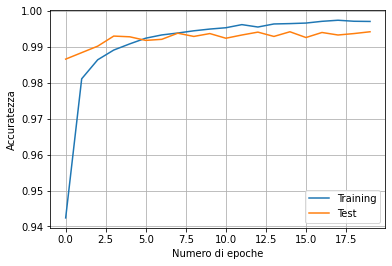

In [ ]:
# visualizzo graficamente l'andamento del training e dell'accuratezza nelle previsioni
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Test')
plt.grid()
plt.legend()
plt.xlabel('Numero di epoche')
plt.ylabel('Accuratezza')
plt.show()
# questo andamento si chiama overfitting perchè l'accuratesta e il training ad un certo punto si separano
# nella quarta lezione abbiamo ingrandito la rete e aumentato l'accuratezza della previsione

In [ ]:
from keras.models import load_model
best_model = load_model('best_model.hdf5')
# y_pred = np.around(model.predict(X_test_scaled))[:,0]
# y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
y_pred = np.argmax(best_model.predict(X_test_tensor), axis=1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_pred[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
# questo rappresenta lo score
np.mean(y_pred == y_test)

0.9941

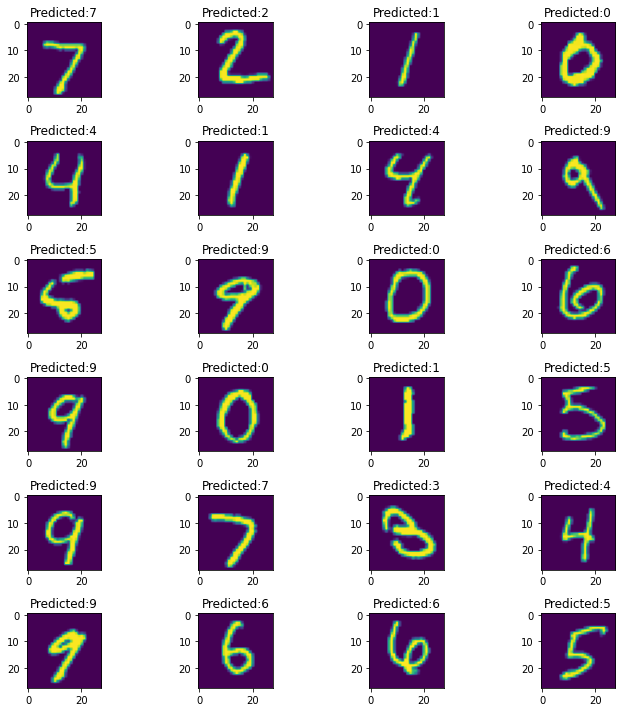

In [ ]:
plt.figure(figsize=(10,10))
for i in range(24):
  plt.subplot(6,4,i+1)
  plt.imshow(X_test[i,:])
  plt.title('Predicted:'+str(y_pred[i]))
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 976,    1,    1,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1027,    0,    0,    0,    1,    3,    1,    0],
       [   0,    0,    0, 1006,    0,    2,    0,    0,    1,    1],
       [   0,    0,    0,    0,  978,    0,    2,    0,    0,    2],
       [   0,    0,    0,    6,    0,  884,    1,    0,    0,    1],
       [   1,    3,    1,    0,    0,    1,  950,    0,    2,    0],
       [   0,    4,    4,    1,    0,    0,    0, 1018,    0,    1],
       [   0,    0,    1,    1,    1,    2,    0,    0,  967,    2],
       [   1,    0,    0,    1,    4,    3,    0,    0,    0, 1000]])

In [ ]:
# da informazioni sul migliore modello salvato
best_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 24)        624       
                                                                 
 average_pooling2d_5 (Averag  (None, 14, 14, 24)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        38464     
                                                                 
 average_pooling2d_6 (Averag  (None, 5, 5, 64)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_19 (Dense)            (None, 480)             

In [ ]:
input_dim = 784
layer1_dim = 1000
layer2_dim = 1000
output_dim = 10

parameter1 = input_dim*layer1_dim + layer1_dim
print(parameter1)

parameter2 = layer1_dim*layer2_dim + layer2_dim
print(parameter2)

parameter3 = layer2_dim*output_dim + output_dim
print(parameter3)

parameter1+parameter2+parameter3